# Week 1 Challenge





#                                           DATA IMBALANCE

### What is data imbalance?
- Data imbalance is a scenario that reflects unequal distribution of classes within a data set.
They are a common problem in classification learning where there is data  disprotionate
ratio of observation in each class.


### why we need to handle data imbalance?
- We need to deal with imbalanced data sets when the value of finding the minority class is much higher than that of finding the majority.so the imbalance fails most algoriithms from finding a proper solution.
In most classification data sets we do not have exactly equal number of instances in each case.We always expect class imbalance in many cases.


### What type of data are balanced?
- Types of data which are balanced are those which the class is not 50/50 or 60/40 distribution


### Methods used to handle data imbalance
1. **The use of right evaluation metric**
Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.

2. **Use K-fold Cross-Validation in the right way**

3.  **Resample the training set**
Apart from using different evaluation criteria, one can also work on getting different dataset. Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.
we have 
***Under-sampling*** and ***Over-sampling***

4.  **Ensemble different resampled data sets**
5.  **Resample with different ratio**
Instead of training all models with the same ratio in the ensemble, it is worth trying to ensemble different ratios.
6. **Cluster the abudant class**
7. **Design your own model**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data= pd.read_csv('traindata.csv')
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [3]:
data.shape

(17190, 15)

In [4]:
data.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [5]:
data=data.replace({'continue':1,'drop':0})

In [6]:
data['caste'].unique()

array(['BC', 'ST', 'SC', 'OC'], dtype=object)

In [7]:
data=data.replace({'F':1,'M':0})

In [8]:
data=data.replace({'other':0,'father':1,'mother':2,'mixed':3})

In [9]:
data=data.replace({'True':1,'False':0})

In [10]:
data=data.replace({'BC':0,'ST':1,'SC':2,'OC':3})

In [11]:
data=data.replace({True:1,False:0})

In [12]:
x=data.corr()
x['continue_drop'].sort_values(ascending=False)

continue_drop         1.000000
caste                 0.038462
guardian              0.033059
languages_teacher     0.018842
science_marks         0.007258
mathematics_marks     0.007258
school_id             0.000396
establishment_year   -0.000519
total_students       -0.005051
total_toilets        -0.009832
gender               -0.043430
internet             -0.060419
english_marks        -0.073242
science_teacher      -0.127864
Name: continue_drop, dtype: float64

In [13]:
data.size

257850

In [14]:
data.drop(['student_id'],axis=1,inplace=True)

In [15]:
data.drop(['science_marks','mathematics_marks','school_id','establishment_year','total_students','total_toilets'], axis=1 ,inplace=True)
data.head()

,continue_drop,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
0,1,0,0,0.468,7,6,0,1
1,1,0,0,0.420,8,10,2,0
2,1,1,0,0.601,1,4,2,0
3,1,1,1,0.611,2,5,1,1
4,1,1,2,0.478,1,10,2,1


In [16]:
data.isnull().sum()

continue_drop        0
gender               0
caste                0
english_marks        0
science_teacher      0
languages_teacher    0
guardian             0
internet             0
dtype: int64

In [17]:
data.columns

Index(['continue_drop', 'gender', 'caste', 'english_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet'],
      dtype='object')

In [18]:
target =data['continue_drop'].copy()

In [19]:
target.tail(5)

17185    0
17186    1
17187    1
17188    1
17189    1
Name: continue_drop, dtype: int64

### For the case am going to use Resampling the training set

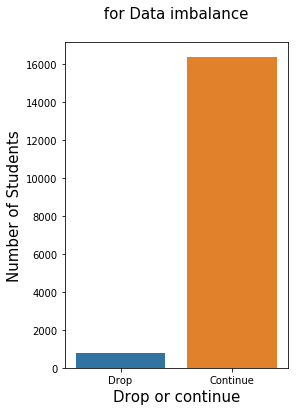

In [42]:
#visualizion of data imbalance in columns

import seaborn as sns
plt.figure(figsize=(4,6))
sns.countplot(data=data, x='continue_drop')
plt.title(" for Data imbalance \n ", fontsize = 15)
plt.xlabel("Drop or continue", fontsize = 15);
plt.ylabel("Number of Students", fontsize = 15);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

**The above diagram display the unbalanced data**

In [22]:
#handling imbalance class
majority = data[data['continue_drop']==1]
minority = data[data['continue_drop']==0]

In [23]:
majority.shape

(16384, 8)

In [24]:
minority.shape


(806, 8)

In [25]:
count_1,count_0 = data['continue_drop'].value_counts()

In [26]:
# upsampling majority class
upsampled = minority.sample(count_1,replace=True)
upsampled.sample(4)

,continue_drop,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
10421,0,1,0,0.820,4,9,2,1
12138,0,0,0,0.216,6,5,2,1
13994,0,1,0,0.511,6,7,1,1
2655,0,1,0,0.472,4,7,2,0


In [27]:
data_balanced1 = pd.concat([upsampled,majority], axis = 0)

In [28]:
downsampled = majority.sample(count_1,random_state=100)

In [29]:
data_balanced = pd.concat([upsampled,downsampled], axis = 0)

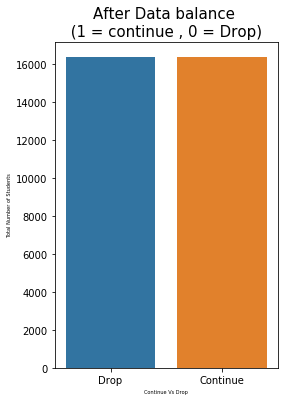

In [43]:
import seaborn as sns
plt.figure(figsize=(4,6))
sns.countplot(data_balanced['continue_drop'])
plt.title("After Data balance \n (1 = continue , 0 = Drop) ", fontsize = 15)
plt.xlabel("Continue Vs Drop", fontsize = 5);
plt.ylabel("Total Number of Students", fontsize = 5);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

In [31]:
data_balanced['continue_drop'].value_counts()

1    16384
0    16384
Name: continue_drop, dtype: int64

In [32]:
features = data.drop(['continue_drop'],axis=1)

In [33]:
features.head()

,gender,caste,english_marks,science_teacher,languages_teacher,guardian,internet
0,0,0,0.468,7,6,0,1
1,0,0,0.420,8,10,2,0
2,1,0,0.601,1,4,2,0
3,1,1,0.611,2,5,1,1
4,1,2,0.478,1,10,2,1


In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.30, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.neighbors import KNeighborsClassifier       
knn = KNeighborsClassifier(n_neighbors=5)               
knn.fit(x_train, y_train)                                

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
x_answer=confusion_matrix(y_test,y_pred)
x_answer

### F1 score

In [ ]:
# testing accuracy using f1_score
from sklearn.metrics import f1_score
f1_acc = f1_score(y_test,y_pred)
f1_acc

In [ ]:
#loading test data
data2=pd.read_csv('data/test_data_week_1_challenge.csv')

In [ ]:
data2.head(2)

In [ ]:
data2['guardian'].unique()

In [ ]:
data2['caste'].unique()

In [ ]:
data2['gender'].unique()

In [ ]:
data2['internet'].unique()

In [ ]:
#converting boolean into numerical
data2=data2.replace({True:1,False:0})

In [ ]:
data2['internet'].unique()

In [ ]:
data2=data2.replace({'BC':0,'ST':1,'SC':2,'OC':3})

In [ ]:
data2=data2.replace({'F':1,'M':0})

In [ ]:
data2=data2.replace({'other':0,'father':1,'mother':2,'mixed':3})

In [ ]:
data2.dtypes

In [ ]:
data2.drop(['science_marks','mathematics_marks','school_id','establishment_year','total_students','total_toilets'], axis=1 ,inplace=True)


In [ ]:
data2.drop(['student_id'],axis=1,inplace=True)

In [ ]:
data2.head()

In [ ]:
test=knn.predict(data2)

In [ ]:
test

In [ ]:
test=pd.DataFrame(test,columns=['predictions'])
test.head(5)

In [ ]:
np.save("week-1-Challenge.npy",results)